## First import necessary libraries, load the datasets, merge two datasets. 
### This step was already done in data wrangling part

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
train = pd.read_csv('../input/train.csv')
weather = pd.read_csv('../input/weather.csv')
train['Date'] = pd.to_datetime(train['Date'])
weather['Date'] = pd.to_datetime(weather['Date'])
df_train = pd.merge(train, weather, on='Date', how='inner')

### Check if the dataframe has null values, NaN values, or duplicate values.

In [2]:
null_values = df_train.isnull().any()
nan_values = df_train.isna().any()
duplicate_columns = df_train.columns[df_train.apply(lambda x: x.duplicated()).any()].tolist()
df_train.columns
df_train=df_train[['Date', 'Species', 'Trap','Latitude', 'Longitude', 'NumMosquitos', 'WnvPresent', 'Tmax', 'Tmin', 'Tavg',
  'Heat', 'Sunrise', 'Sunset', 'Depth', 'SnowFall', 'PrecipTotal', 'StnPressure',
       'SeaLevel', 'AvgSpeed' ]]

In [3]:
df_train=df_train[['Date', 'Species','Latitude', 'Longitude', 'NumMosquitos', 'WnvPresent', 'Tmax', 'Tmin', 'Tavg',
 'PrecipTotal', 'StnPressure',
       'SeaLevel', 'AvgSpeed' ]]

In [4]:
df_train['Tavg'] = pd.to_numeric(df_train['Tavg'], errors='coerce')
df_train['PrecipTotal'] = pd.to_numeric(df_train['PrecipTotal'], errors='coerce')
df_train['StnPressure'] = pd.to_numeric(df_train['StnPressure'], errors='coerce')
df_train['SeaLevel'] = pd.to_numeric(df_train['SeaLevel'], errors='coerce')
df_train['AvgSpeed'] = pd.to_numeric(df_train['AvgSpeed'], errors='coerce')
df_train['WnvPresent'] = pd.to_numeric(df_train['WnvPresent'], errors='coerce')

In [5]:
Train = df_train.groupby(['Latitude', 'Longitude', 'Species', 'Date'], as_index=False).agg({
    'NumMosquitos': 'sum',
    'Tmax': 'mean',
    'Tmin': 'mean',
    'Tavg': 'mean',
    'PrecipTotal': 'mean',
    'StnPressure': 'mean',
    'SeaLevel': 'mean',
    'AvgSpeed': 'mean',
    'WnvPresent': 'mean',
}).set_index(['Latitude', 'Longitude'])

In [6]:
Train

Species       Date  NumMosquitos  Tmax  Tmin  \
Latitude  Longitude                                                           
41.644612 -87.604498     CULEX PIPIENS 2007-08-02            12  91.0  71.5   
          -87.604498     CULEX PIPIENS 2007-08-07            52  91.5  72.5   
          -87.604498     CULEX PIPIENS 2007-08-15            30  80.5  71.5   
          -87.604498     CULEX PIPIENS 2007-08-22             4  90.0  69.5   
          -87.604498     CULEX PIPIENS 2007-08-24             4  80.5  69.0   
...                                ...        ...           ...   ...   ...   
42.017430 -87.687769    CULEX RESTUANS 2011-06-30             2  88.5  63.0   
          -87.687769    CULEX RESTUANS 2011-07-11            46  89.0  70.5   
          -87.687769    CULEX RESTUANS 2011-07-15             2  86.5  70.5   
          -87.687769  CULEX SALINARIUS 2007-07-11             2  77.0  62.5   
          -87.687769   CULEX TERRITANS 2007-08-21             2  86.0  69.0   

                      Tavg  PrecipTotal  StnPressure  SeaLevel  AvgSpeed  \
Latitude  Longitude                                                        
41.644612 -87.604498  81.5        0.000       29.285    29.960      6.55   
          -87.604498  82.5        0.685       29.085    29.750      8.90   
          -87.604498  76.5        0.530       29.200    29.880      6.45   
          -87.604498  80.0        0.625       29.260    29.935      8.95   
          -87.604498  75.0        0.220       29.135    29.815      7.20   
...                    ...          ...          ...       ...       ...   
42.017430 -87.687769  76.0        0.030       29.310    29.995     10.00   
          -87.687769  80.0        0.260       29.150    29.815      8.25   
          -87.687769  79.0        0.000       29.300    29.970      6.75   
          -87.687769  70.0        0.000       29.255    29.925     11.05   
          -87.687769  77.5        0.010       29.235    29.900      6.00   

                      WnvPresent  
Latitude  Longitude               
41.644612 -87.604498         0.0  
          -87.604498         0.0  
          -87.604498         0.0  
          -87.604498         0.0  
          -87.604498         0.0  
...                          ...  
42.017430 -87.687769         0.0  
          -87.687769         0.0  
          -87.687769         0.0  
          -87.687769         0.0  
          -87.687769         0.0  

[8475 rows x 11 columns]

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'NumMosquitos'}>,
        <Axes: title={'center': 'Tmax'}>],
       [<Axes: title={'center': 'Tmin'}>,
        <Axes: title={'center': 'Tavg'}>,
        <Axes: title={'center': 'PrecipTotal'}>],
       [<Axes: title={'center': 'StnPressure'}>,
        <Axes: title={'center': 'SeaLevel'}>,
        <Axes: title={'center': 'AvgSpeed'}>],
       [<Axes: title={'center': 'WnvPresent'}>, <Axes: >, <Axes: >]],
      dtype=object)

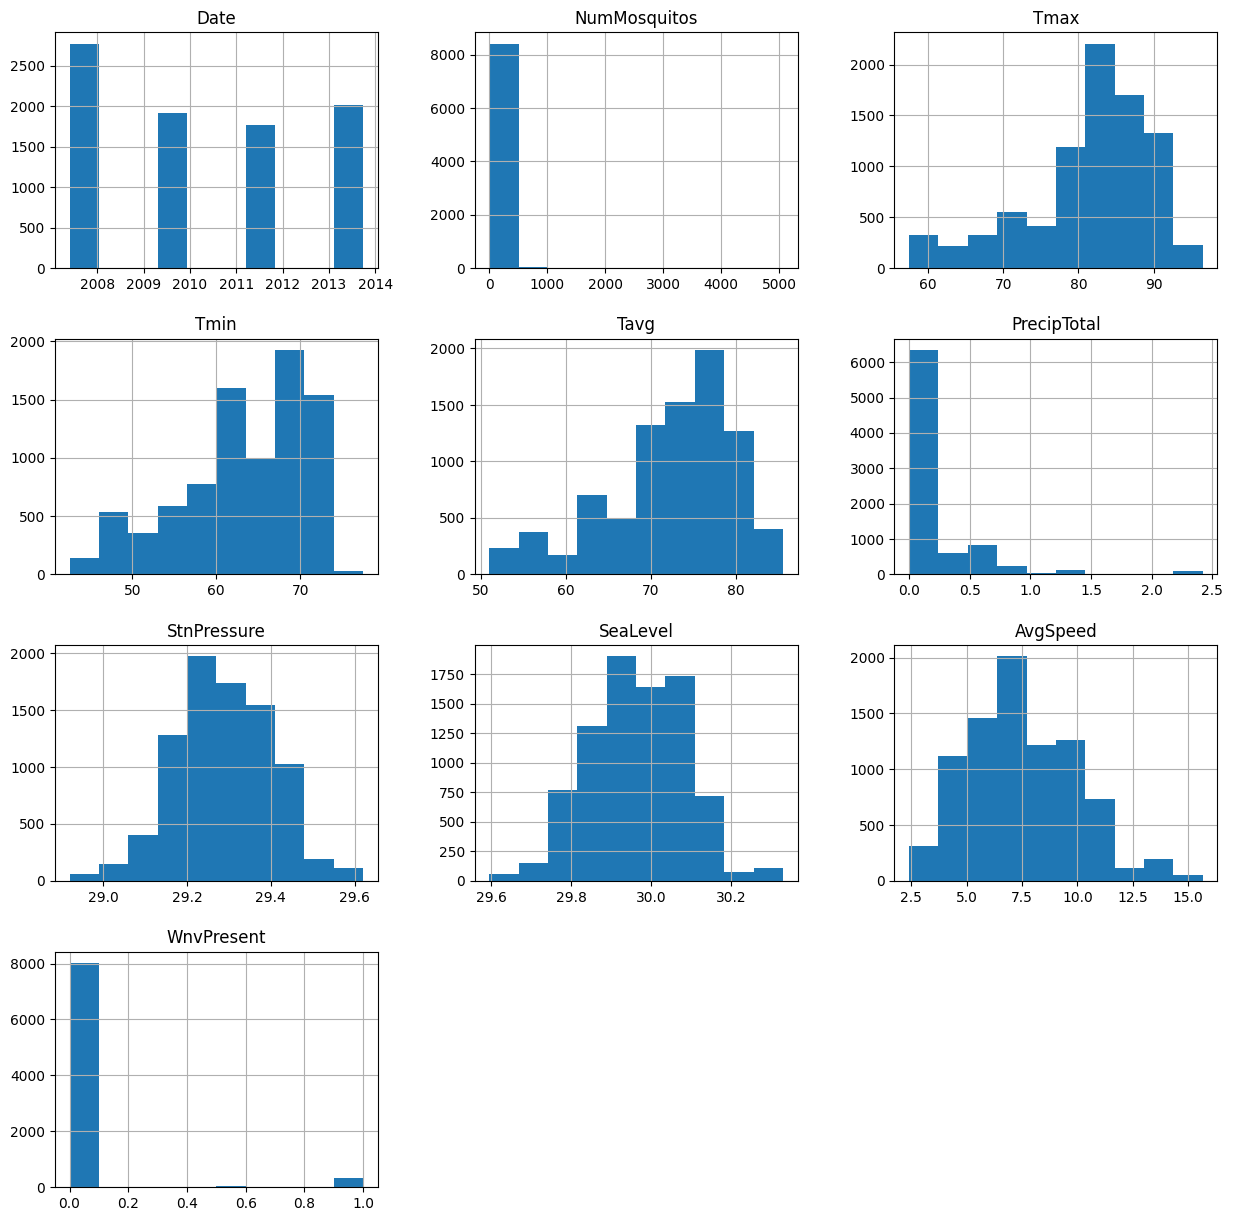

In [7]:
Train.hist(figsize=(15,15))

## Looks like Data is clean now and ready to be analyzed. Next is to see relation between features to know more about our data.

In [8]:
Train.columns

Index(['Species', 'Date', 'NumMosquitos', 'Tmax', 'Tmin', 'Tavg',
       'PrecipTotal', 'StnPressure', 'SeaLevel', 'AvgSpeed', 'WnvPresent'],
      dtype='object')

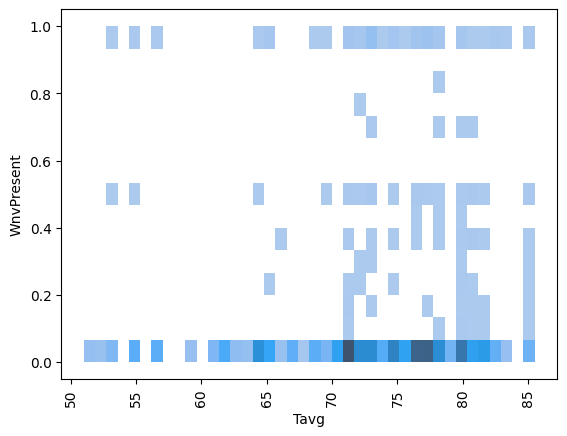

In [9]:
sns.histplot(x='Tavg', y='WnvPresent', data=Train)
plt.xticks(rotation=90)
plt.show()

### Looks like Virus are not present at too low and too high temperature. The favorable temperature for them is from around 68 to around 82.

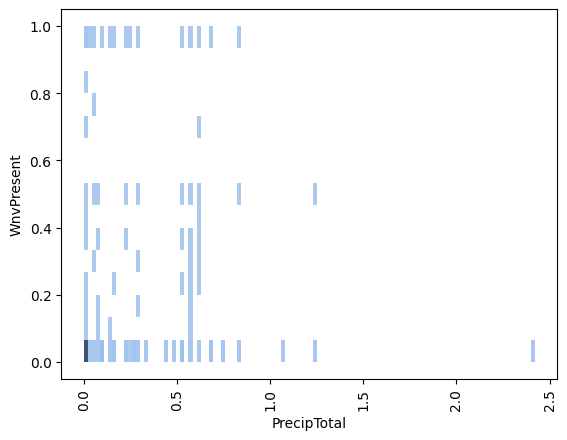

In [10]:
Train.reset_index(inplace=True) 
sns.histplot(x='PrecipTotal', y='WnvPresent', data=Train)
plt.xticks(rotation=90)
plt.show()

### WNV is present in only those locations that have less precipitation rate

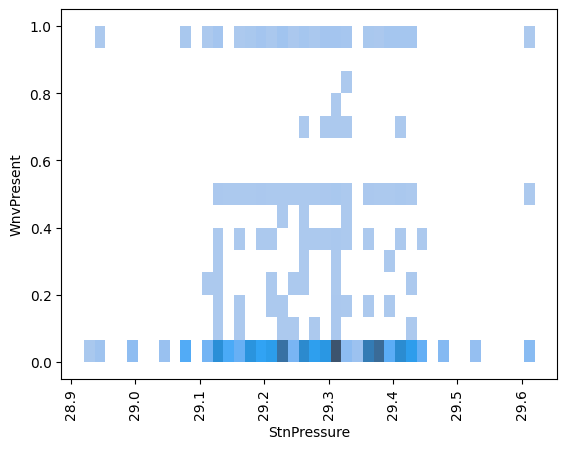

In [11]:
sns.histplot(x='StnPressure', y='WnvPresent', data=Train)
plt.xticks(rotation=90)
plt.show()

### WNV are favorable at pressure between 29.2 to 29.4.

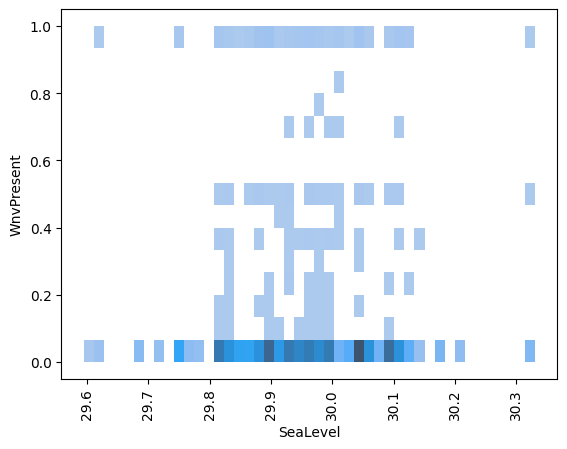

In [12]:
sns.histplot(x='SeaLevel', y='WnvPresent', data=Train)
plt.xticks(rotation=90)
plt.show()

### WNV seems  to present in locations with 29.8 to 30.1 m sealevel.

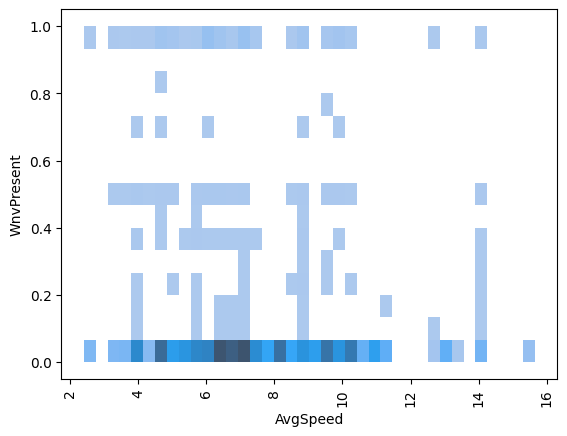

In [13]:
sns.histplot(x='AvgSpeed', y='WnvPresent', data=Train)
plt.xticks(rotation=90)
plt.show()

### Looks like WNV not present at locations with high wind speed greater than 14 miles/hour and at too low wind speed lesser than 2.5 miles/hour

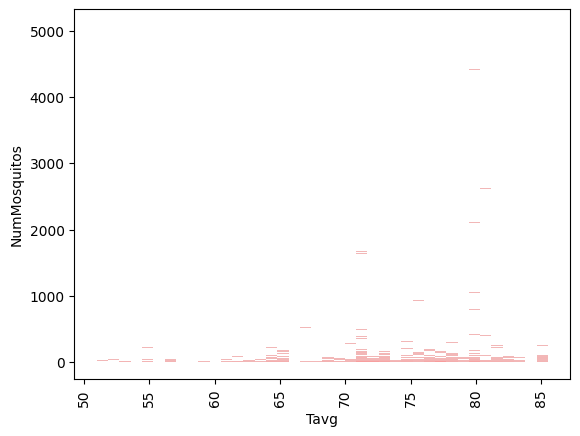

In [14]:
sns.histplot(x='Tavg', y='NumMosquitos', data=Train, color='red', alpha=1)
plt.xticks(rotation=90)
plt.show()

### Almost no Mosquitos outside 68-82 temperature range

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'CULEX PIPIENS'),
  Text(1, 0, 'CULEX PIPIENS/RESTUANS'),
  Text(2, 0, 'CULEX RESTUANS'),
  Text(3, 0, 'CULEX SALINARIUS'),
  Text(4, 0, 'CULEX TERRITANS'),
  Text(5, 0, 'CULEX TARSALIS'),
  Text(6, 0, 'CULEX ERRATICUS')])

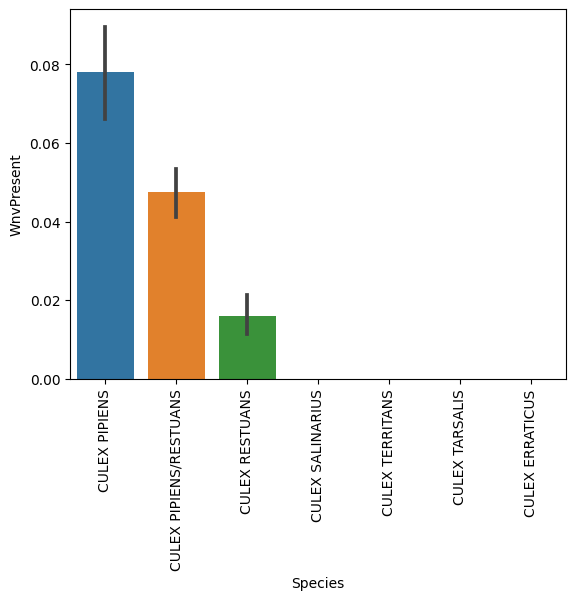

In [15]:
sns.barplot(x='Species', y='WnvPresent', data=Train)
plt.xticks(rotation=90)

## This is good finding that only three types of Culex mosquitoes ('CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS', and 'CULEX RESTUANS') can cause Virus

### Keep only those rows containing those three species of mosquitos.

In [16]:
Train = Train[Train['Species'].isin(['CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS'])]

In [17]:
Train.head()

,Latitude,Longitude,Species,Date,NumMosquitos,Tmax,Tmin,Tavg,PrecipTotal,StnPressure,SeaLevel,AvgSpeed,WnvPresent
0,41.644612,-87.604498,CULEX PIPIENS,2007-08-02,12,91.0,71.5,81.5,0.000,29.285,29.960,6.55,0.0
1,41.644612,-87.604498,CULEX PIPIENS,2007-08-07,52,91.5,72.5,82.5,0.685,29.085,29.750,8.90,0.0
2,41.644612,-87.604498,CULEX PIPIENS,2007-08-15,30,80.5,71.5,76.5,0.530,29.200,29.880,6.45,0.0
3,41.644612,-87.604498,CULEX PIPIENS,2007-08-22,4,90.0,69.5,80.0,0.625,29.260,29.935,8.95,0.0
4,41.644612,-87.604498,CULEX PIPIENS,2007-08-24,4,80.5,69.0,75.0,0.220,29.135,29.815,7.20,0.0


# Code up to here are from previous steps 
# Feature Engineering step starts from here.

In [18]:
Train

,Latitude,Longitude,Species,Date,NumMosquitos,Tmax,Tmin,Tavg,PrecipTotal,StnPressure,SeaLevel,AvgSpeed,WnvPresent
0,41.644612,-87.604498,CULEX PIPIENS,2007-08-02,12,91.0,71.5,81.5,0.000,29.285,29.960,6.55,0.0
1,41.644612,-87.604498,CULEX PIPIENS,2007-08-07,52,91.5,72.5,82.5,0.685,29.085,29.750,8.90,0.0
2,41.644612,-87.604498,CULEX PIPIENS,2007-08-15,30,80.5,71.5,76.5,0.530,29.200,29.880,6.45,0.0
3,41.644612,-87.604498,CULEX PIPIENS,2007-08-22,4,90.0,69.5,80.0,0.625,29.260,29.935,8.95,0.0
4,41.644612,-87.604498,CULEX PIPIENS,2007-08-24,4,80.5,69.0,75.0,0.220,29.135,29.815,7.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8468,42.017430,-87.687769,CULEX RESTUANS,2011-06-10,4,70.0,51.0,60.5,0.480,29.235,29.930,7.75,0.0
8469,42.017430,-87.687769,CULEX RESTUANS,2011-06-17,4,82.0,62.0,72.0,0.000,29.155,29.820,6.40,0.0
8470,42.017430,-87.687769,CULEX RESTUANS,2011-06-30,2,88.5,63.0,76.0,0.030,29.310,29.995,10.00,0.0
8471,42.017430,-87.687769,CULEX RESTUANS,2011-07-11,46,89.0,70.5,80.0,0.260,29.150,29.815,8.25,0.0


In [19]:
Train['DayOfWeek'] = Train['Date'].dt.dayofweek

/var/folders/6q/pwz4vcc955s4cn61rqrhsgp80000gn/T/ipykernel_62014/2630323045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['DayOfWeek'] = Train['Date'].dt.dayofweek


In [20]:
Train.head()

,Latitude,Longitude,Species,Date,NumMosquitos,Tmax,Tmin,Tavg,PrecipTotal,StnPressure,SeaLevel,AvgSpeed,WnvPresent,DayOfWeek
0,41.644612,-87.604498,CULEX PIPIENS,2007-08-02,12,91.0,71.5,81.5,0.000,29.285,29.960,6.55,0.0,3
1,41.644612,-87.604498,CULEX PIPIENS,2007-08-07,52,91.5,72.5,82.5,0.685,29.085,29.750,8.90,0.0,1
2,41.644612,-87.604498,CULEX PIPIENS,2007-08-15,30,80.5,71.5,76.5,0.530,29.200,29.880,6.45,0.0,2
3,41.644612,-87.604498,CULEX PIPIENS,2007-08-22,4,90.0,69.5,80.0,0.625,29.260,29.935,8.95,0.0,2
4,41.644612,-87.604498,CULEX PIPIENS,2007-08-24,4,80.5,69.0,75.0,0.220,29.135,29.815,7.20,0.0,4


### New column 'DayOfWeek' is created (with values 0, 1, 2, 3, 4, 5, 6) where 0 is Monday and 6 is Sunday.

In [21]:
Train['WeekNumber'] = Train['Date'].dt.week
Train.head()

/var/folders/6q/pwz4vcc955s4cn61rqrhsgp80000gn/T/ipykernel_62014/895236366.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Train['WeekNumber'] = Train['Date'].dt.week
/var/folders/6q/pwz4vcc955s4cn61rqrhsgp80000gn/T/ipykernel_62014/895236366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['WeekNumber'] = Train['Date'].dt.week


,Latitude,Longitude,Species,Date,NumMosquitos,Tmax,Tmin,Tavg,PrecipTotal,StnPressure,SeaLevel,AvgSpeed,WnvPresent,DayOfWeek,WeekNumber
0,41.644612,-87.604498,CULEX PIPIENS,2007-08-02,12,91.0,71.5,81.5,0.000,29.285,29.960,6.55,0.0,3,31
1,41.644612,-87.604498,CULEX PIPIENS,2007-08-07,52,91.5,72.5,82.5,0.685,29.085,29.750,8.90,0.0,1,32
2,41.644612,-87.604498,CULEX PIPIENS,2007-08-15,30,80.5,71.5,76.5,0.530,29.200,29.880,6.45,0.0,2,33
3,41.644612,-87.604498,CULEX PIPIENS,2007-08-22,4,90.0,69.5,80.0,0.625,29.260,29.935,8.95,0.0,2,34
4,41.644612,-87.604498,CULEX PIPIENS,2007-08-24,4,80.5,69.0,75.0,0.220,29.135,29.815,7.20,0.0,4,34


### New column WeekNumber is created above

In [22]:
Train['IsWeekend'] = Train['Date'].dt.dayofweek // 5
Train.head()

/var/folders/6q/pwz4vcc955s4cn61rqrhsgp80000gn/T/ipykernel_62014/2012601344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['IsWeekend'] = Train['Date'].dt.dayofweek // 5


,Latitude,Longitude,Species,Date,NumMosquitos,Tmax,Tmin,Tavg,PrecipTotal,StnPressure,SeaLevel,AvgSpeed,WnvPresent,DayOfWeek,WeekNumber,IsWeekend
0,41.644612,-87.604498,CULEX PIPIENS,2007-08-02,12,91.0,71.5,81.5,0.000,29.285,29.960,6.55,0.0,3,31,0
1,41.644612,-87.604498,CULEX PIPIENS,2007-08-07,52,91.5,72.5,82.5,0.685,29.085,29.750,8.90,0.0,1,32,0
2,41.644612,-87.604498,CULEX PIPIENS,2007-08-15,30,80.5,71.5,76.5,0.530,29.200,29.880,6.45,0.0,2,33,0
3,41.644612,-87.604498,CULEX PIPIENS,2007-08-22,4,90.0,69.5,80.0,0.625,29.260,29.935,8.95,0.0,2,34,0
4,41.644612,-87.604498,CULEX PIPIENS,2007-08-24,4,80.5,69.0,75.0,0.220,29.135,29.815,7.20,0.0,4,34,0


### Here, a new column 'IsWeekend' is created,  where 1 represents weekend (Saturday or Sunday) and 0 represents weekday (Monday to Friday)

In [23]:
Train['Quarter'] = Train['Date'].dt.quarter
Train.head()

/var/folders/6q/pwz4vcc955s4cn61rqrhsgp80000gn/T/ipykernel_62014/2813628017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['Quarter'] = Train['Date'].dt.quarter


,Latitude,Longitude,Species,Date,NumMosquitos,Tmax,Tmin,Tavg,PrecipTotal,StnPressure,SeaLevel,AvgSpeed,WnvPresent,DayOfWeek,WeekNumber,IsWeekend,Quarter
0,41.644612,-87.604498,CULEX PIPIENS,2007-08-02,12,91.0,71.5,81.5,0.000,29.285,29.960,6.55,0.0,3,31,0,3
1,41.644612,-87.604498,CULEX PIPIENS,2007-08-07,52,91.5,72.5,82.5,0.685,29.085,29.750,8.90,0.0,1,32,0,3
2,41.644612,-87.604498,CULEX PIPIENS,2007-08-15,30,80.5,71.5,76.5,0.530,29.200,29.880,6.45,0.0,2,33,0,3
3,41.644612,-87.604498,CULEX PIPIENS,2007-08-22,4,90.0,69.5,80.0,0.625,29.260,29.935,8.95,0.0,2,34,0,3
4,41.644612,-87.604498,CULEX PIPIENS,2007-08-24,4,80.5,69.0,75.0,0.220,29.135,29.815,7.20,0.0,4,34,0,3


### A new column 'Quarter' representing the quarter of the year is added.

In [24]:
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

Train['Season'] = Train['Date'].dt.month.apply(get_season)

/var/folders/6q/pwz4vcc955s4cn61rqrhsgp80000gn/T/ipykernel_62014/1435067460.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['Season'] = Train['Date'].dt.month.apply(get_season)


In [25]:
Train.head()

,Latitude,Longitude,Species,Date,NumMosquitos,Tmax,Tmin,Tavg,PrecipTotal,StnPressure,SeaLevel,AvgSpeed,WnvPresent,DayOfWeek,WeekNumber,IsWeekend,Quarter,Season
0,41.644612,-87.604498,CULEX PIPIENS,2007-08-02,12,91.0,71.5,81.5,0.000,29.285,29.960,6.55,0.0,3,31,0,3,Summer
1,41.644612,-87.604498,CULEX PIPIENS,2007-08-07,52,91.5,72.5,82.5,0.685,29.085,29.750,8.90,0.0,1,32,0,3,Summer
2,41.644612,-87.604498,CULEX PIPIENS,2007-08-15,30,80.5,71.5,76.5,0.530,29.200,29.880,6.45,0.0,2,33,0,3,Summer
3,41.644612,-87.604498,CULEX PIPIENS,2007-08-22,4,90.0,69.5,80.0,0.625,29.260,29.935,8.95,0.0,2,34,0,3,Summer
4,41.644612,-87.604498,CULEX PIPIENS,2007-08-24,4,80.5,69.0,75.0,0.220,29.135,29.815,7.20,0.0,4,34,0,3,Summer


In [26]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8169 entries, 0 to 8472
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Latitude      8169 non-null   float64       
 1   Longitude     8169 non-null   float64       
 2   Species       8169 non-null   object        
 3   Date          8169 non-null   datetime64[ns]
 4   NumMosquitos  8169 non-null   int64         
 5   Tmax          8169 non-null   float64       
 6   Tmin          8169 non-null   float64       
 7   Tavg          8169 non-null   float64       
 8   PrecipTotal   7963 non-null   float64       
 9   StnPressure   8169 non-null   float64       
 10  SeaLevel      8169 non-null   float64       
 11  AvgSpeed      8169 non-null   float64       
 12  WnvPresent    8169 non-null   float64       
 13  DayOfWeek     8169 non-null   int64         
 14  WeekNumber    8169 non-null   int64         
 15  IsWeekend     8169 non-null   int64   

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Train['Season'] = label_encoder.fit_transform(Train['Season'])

/var/folders/6q/pwz4vcc955s4cn61rqrhsgp80000gn/T/ipykernel_62014/4164120591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['Season'] = label_encoder.fit_transform(Train['Season'])


In [28]:
Train.head()

,Latitude,Longitude,Species,Date,NumMosquitos,Tmax,Tmin,Tavg,PrecipTotal,StnPressure,SeaLevel,AvgSpeed,WnvPresent,DayOfWeek,WeekNumber,IsWeekend,Quarter,Season
0,41.644612,-87.604498,CULEX PIPIENS,2007-08-02,12,91.0,71.5,81.5,0.000,29.285,29.960,6.55,0.0,3,31,0,3,2
1,41.644612,-87.604498,CULEX PIPIENS,2007-08-07,52,91.5,72.5,82.5,0.685,29.085,29.750,8.90,0.0,1,32,0,3,2
2,41.644612,-87.604498,CULEX PIPIENS,2007-08-15,30,80.5,71.5,76.5,0.530,29.200,29.880,6.45,0.0,2,33,0,3,2
3,41.644612,-87.604498,CULEX PIPIENS,2007-08-22,4,90.0,69.5,80.0,0.625,29.260,29.935,8.95,0.0,2,34,0,3,2
4,41.644612,-87.604498,CULEX PIPIENS,2007-08-24,4,80.5,69.0,75.0,0.220,29.135,29.815,7.20,0.0,4,34,0,3,2


### Here, level encoder is applied for 'Season' column. 'Fall' is represented as 0, 'Spring' as 1, and 'Summer' as 2.

(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

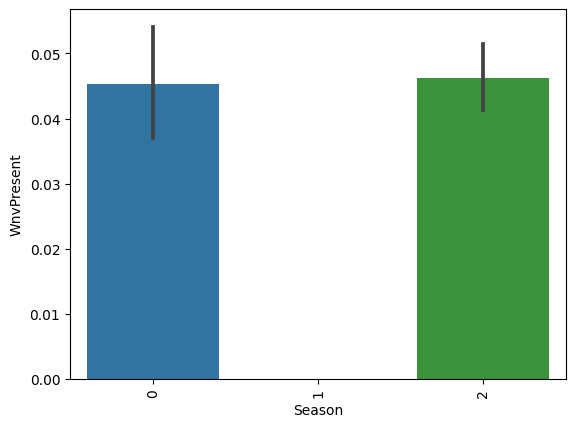

In [29]:
sns.barplot(x='Season', y='WnvPresent', data=Train)
plt.xticks(rotation=90)

In [30]:
Train = pd.get_dummies(Train, columns=['Species'], prefix=['Species'])

In [31]:
Train.head()

,Latitude,Longitude,Date,NumMosquitos,Tmax,Tmin,Tavg,PrecipTotal,StnPressure,SeaLevel,AvgSpeed,WnvPresent,DayOfWeek,WeekNumber,IsWeekend,Quarter,Season,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS
0,41.644612,-87.604498,2007-08-02,12,91.0,71.5,81.5,0.000,29.285,29.960,6.55,0.0,3,31,0,3,2,1,0,0
1,41.644612,-87.604498,2007-08-07,52,91.5,72.5,82.5,0.685,29.085,29.750,8.90,0.0,1,32,0,3,2,1,0,0
2,41.644612,-87.604498,2007-08-15,30,80.5,71.5,76.5,0.530,29.200,29.880,6.45,0.0,2,33,0,3,2,1,0,0
3,41.644612,-87.604498,2007-08-22,4,90.0,69.5,80.0,0.625,29.260,29.935,8.95,0.0,2,34,0,3,2,1,0,0
4,41.644612,-87.604498,2007-08-24,4,80.5,69.0,75.0,0.220,29.135,29.815,7.20,0.0,4,34,0,3,2,1,0,0


In [37]:
Train.drop(columns=['Date'], inplace=True)
Train.head()

,Latitude,Longitude,NumMosquitos,Tmax,Tmin,Tavg,PrecipTotal,StnPressure,SeaLevel,AvgSpeed,WnvPresent,DayOfWeek,WeekNumber,IsWeekend,Quarter,Season,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS
0,41.644612,-87.604498,12,91.0,71.5,81.5,0.000,29.285,29.960,6.55,0.0,3,31,0,3,2,1,0,0
1,41.644612,-87.604498,52,91.5,72.5,82.5,0.685,29.085,29.750,8.90,0.0,1,32,0,3,2,1,0,0
2,41.644612,-87.604498,30,80.5,71.5,76.5,0.530,29.200,29.880,6.45,0.0,2,33,0,3,2,1,0,0
3,41.644612,-87.604498,4,90.0,69.5,80.0,0.625,29.260,29.935,8.95,0.0,2,34,0,3,2,1,0,0
4,41.644612,-87.604498,4,80.5,69.0,75.0,0.220,29.135,29.815,7.20,0.0,4,34,0,3,2,1,0,0


### In above, I performed one-hot encoding for 'Species' categorical column.

In [33]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8169 entries, 0 to 8472
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Latitude                        8169 non-null   float64       
 1   Longitude                       8169 non-null   float64       
 2   Date                            8169 non-null   datetime64[ns]
 3   NumMosquitos                    8169 non-null   int64         
 4   Tmax                            8169 non-null   float64       
 5   Tmin                            8169 non-null   float64       
 6   Tavg                            8169 non-null   float64       
 7   PrecipTotal                     7963 non-null   float64       
 8   StnPressure                     8169 non-null   float64       
 9   SeaLevel                        8169 non-null   float64       
 10  AvgSpeed                        8169 non-null   float64       
 11  WnvP

### In above, I saved the cleaned 'Train' dataframe into a csv file called 'clean_train_data.csv' for future use in modeling.

### At last before modeling, I split the whole cleaned dataframe into train and test datasets.

In [42]:
Train

,Latitude,Longitude,NumMosquitos,Tmax,Tmin,Tavg,PrecipTotal,StnPressure,SeaLevel,AvgSpeed,WnvPresent,DayOfWeek,WeekNumber,IsWeekend,Quarter,Season,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS
0,41.644612,-87.604498,12,91.0,71.5,81.5,0.000,29.285,29.960,6.55,0.0,3,31,0,3,2,1,0,0
1,41.644612,-87.604498,52,91.5,72.5,82.5,0.685,29.085,29.750,8.90,0.0,1,32,0,3,2,1,0,0
2,41.644612,-87.604498,30,80.5,71.5,76.5,0.530,29.200,29.880,6.45,0.0,2,33,0,3,2,1,0,0
3,41.644612,-87.604498,4,90.0,69.5,80.0,0.625,29.260,29.935,8.95,0.0,2,34,0,3,2,1,0,0
4,41.644612,-87.604498,4,80.5,69.0,75.0,0.220,29.135,29.815,7.20,0.0,4,34,0,3,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8468,42.017430,-87.687769,4,70.0,51.0,60.5,0.480,29.235,29.930,7.75,0.0,4,23,0,2,2,0,0,1
8469,42.017430,-87.687769,4,82.0,62.0,72.0,0.000,29.155,29.820,6.40,0.0,4,24,0,2,2,0,0,1
8470,42.017430,-87.687769,2,88.5,63.0,76.0,0.030,29.310,29.995,10.00,0.0,3,26,0,2,2,0,0,1
8471,42.017430,-87.687769,46,89.0,70.5,80.0,0.260,29.150,29.815,8.25,0.0,0,28,0,3,2,0,0,1


In [43]:
Train.isnull().any()

Latitude                          False
Longitude                         False
NumMosquitos                      False
Tmax                              False
Tmin                              False
Tavg                              False
PrecipTotal                        True
StnPressure                       False
SeaLevel                          False
AvgSpeed                          False
WnvPresent                        False
DayOfWeek                         False
WeekNumber                        False
IsWeekend                         False
Quarter                           False
Season                            False
Species_CULEX PIPIENS             False
Species_CULEX PIPIENS/RESTUANS    False
Species_CULEX RESTUANS            False
dtype: bool

In [44]:
Train.isna().any()

Latitude                          False
Longitude                         False
NumMosquitos                      False
Tmax                              False
Tmin                              False
Tavg                              False
PrecipTotal                        True
StnPressure                       False
SeaLevel                          False
AvgSpeed                          False
WnvPresent                        False
DayOfWeek                         False
WeekNumber                        False
IsWeekend                         False
Quarter                           False
Season                            False
Species_CULEX PIPIENS             False
Species_CULEX PIPIENS/RESTUANS    False
Species_CULEX RESTUANS            False
dtype: bool

In [45]:
Train['PrecipTotal'].fillna(Train['PrecipTotal'].mean(), inplace=True)

In [46]:
Train.isna().any()

Latitude                          False
Longitude                         False
NumMosquitos                      False
Tmax                              False
Tmin                              False
Tavg                              False
PrecipTotal                       False
StnPressure                       False
SeaLevel                          False
AvgSpeed                          False
WnvPresent                        False
DayOfWeek                         False
WeekNumber                        False
IsWeekend                         False
Quarter                           False
Season                            False
Species_CULEX PIPIENS             False
Species_CULEX PIPIENS/RESTUANS    False
Species_CULEX RESTUANS            False
dtype: bool

In [47]:
Train.isnull().any()

Latitude                          False
Longitude                         False
NumMosquitos                      False
Tmax                              False
Tmin                              False
Tavg                              False
PrecipTotal                       False
StnPressure                       False
SeaLevel                          False
AvgSpeed                          False
WnvPresent                        False
DayOfWeek                         False
WeekNumber                        False
IsWeekend                         False
Quarter                           False
Season                            False
Species_CULEX PIPIENS             False
Species_CULEX PIPIENS/RESTUANS    False
Species_CULEX RESTUANS            False
dtype: bool

In [57]:
threshold = 0.5
Train['WnvPresent'] = Train['WnvPresent'].apply(lambda x: 1 if x >= threshold else 0)

In [58]:
Train.head()

,Latitude,Longitude,NumMosquitos,Tmax,Tmin,Tavg,PrecipTotal,StnPressure,SeaLevel,AvgSpeed,WnvPresent,DayOfWeek,WeekNumber,IsWeekend,Quarter,Season,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS
0,41.644612,-87.604498,12,91.0,71.5,81.5,0.000,29.285,29.960,6.55,0,3,31,0,3,2,1,0,0
1,41.644612,-87.604498,52,91.5,72.5,82.5,0.685,29.085,29.750,8.90,0,1,32,0,3,2,1,0,0
2,41.644612,-87.604498,30,80.5,71.5,76.5,0.530,29.200,29.880,6.45,0,2,33,0,3,2,1,0,0
3,41.644612,-87.604498,4,90.0,69.5,80.0,0.625,29.260,29.935,8.95,0,2,34,0,3,2,1,0,0
4,41.644612,-87.604498,4,80.5,69.0,75.0,0.220,29.135,29.815,7.20,0,4,34,0,3,2,1,0,0


In [66]:
Train['WnvPresent'].value_counts()[0]

7782

In [67]:
Train['WnvPresent'].value_counts()[1]

387

In [61]:
Train.to_csv('CleanData_ForModeling.csv', index=False)

In [62]:
from sklearn.model_selection import train_test_split
X = Train.drop(columns=['WnvPresent'])
y = Train['WnvPresent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5718, 18)
(2451, 18)
(5718,)
(2451,)
